# Title - Climate forecasting

 the weather data available for Australia region. We would like you to review the dataset and apply your analytical skills to understand the data set in terms quality, potential issues, features considered critical for predicting rainfall for a given day, etc. Please do elaborate on any model which you would consider for the task, and its interpretation from a business context.

In [1]:
#import all the necessary libraries

In [1]:
#import numpy and pandas for dataframe and numerical calculation
import pandas as pd
import numpy as np

#Import libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Import library for label Encoding
from sklearn.preprocessing import LabelEncoder

#Import Library for train test split
from sklearn.model_selection import train_test_split

#Import library for logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Import Library for SVM Model
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Import library for random forest classifier
from sklearn.ensemble import RandomForestClassifier

#Import library for GridSearch CV
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("AustraliaRegion.csv")

In [4]:
df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       12/1/2008        Albury     13.4     22.9       0.6          NaN   
1       12/2/2008        Albury      7.4     25.1       0.0          NaN   
2       12/3/2008        Albury     12.9     25.7       0.0          NaN   
3       12/4/2008        Albury      9.2     28.0       0.0          NaN   
4       12/5/2008        Albury     17.5     32.3       1.0          NaN   
...           ...           ...      ...      ...       ...          ...   
10994  12/18/2014  CoffsHarbour     19.3     27.9       0.0          NaN   
10995  12/19/2014  CoffsHarbour     19.8     31.3      33.4          NaN   
10996  12/24/2014  CoffsHarbour     19.3     28.2       NaN          NaN   
10997  12/25/2014  CoffsHarbour     21.5     28.2       0.0          NaN   
10998  12/26/2014  CoffsHarbour     21.9     29.7       5.0          NaN   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0           NaN           W           44.0          W  ...        22.0   
1           NaN         WNW           44.0        NNW  ...        25.0   
2           NaN         WSW           46.0          W  ...        30.0   
3           NaN          NE           24.0         SE  ...        16.0   
4           NaN           W           41.0        ENE  ...        33.0   
...         ...         ...            ...        ...  ...         ...   
10994       NaN         NaN            NaN        NaN  ...        76.0   
10995       NaN         NaN            NaN        NaN  ...        68.0   
10996       NaN         NaN            NaN        NaN  ...        65.0   
10997       NaN         NaN            NaN        NaN  ...        73.0   
10998       NaN         NaN            NaN        NaN  ...        69.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0           1007.7       1007.1       8.0       NaN     16.9     21.8   
1           1010.6       1007.8       NaN       NaN     17.2     24.3   
2           1007.6       1008.7       NaN       2.0     21.0     23.2   
3           1017.6       1012.8       NaN       NaN     18.1     26.5   
4           1010.8       1006.0       7.0       8.0     17.8     29.7   
...            ...          ...       ...       ...      ...      ...   
10994          NaN          NaN       NaN       NaN     24.4     26.9   
10995          NaN          NaN       NaN       NaN     24.8     25.4   
10996          NaN          NaN       NaN       NaN     26.4     27.8   
10997          NaN          NaN       NaN       NaN     26.1     25.7   
10998          NaN          NaN       NaN       NaN     24.9     28.5   

       RainToday  RISK_MM  RainTomorrow  
0             No      0.0            No  
1             No      0.0            No  
2             No      0.0            No  
3             No      1.0            No  
4             No      0.2            No  
...          ...      ...           ...  
10994         No     33.4           Yes  
10995        Yes      0.0            No  
10996        NaN      0.0            No  
10997         No      5.0           Yes  
10998        Yes     20.2           Yes  

[10999 rows x 24 columns]

# EDA

In [5]:
#To check all comumns details
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
#To check null Values
df.isna().sum()

Date                0
Location            0
MinTemp            23
MaxTemp             7
Rainfall           89
Evaporation      6559
Sunshine         8958
WindGustDir       325
WindGustSpeed     325
WindDir9am       1200
WindDir3pm        347
WindSpeed9am      268
WindSpeed3pm      269
Humidity9am       153
Humidity3pm       162
Pressure9am       401
Pressure3pm       408
Cloud9am         5267
Cloud3pm         5075
Temp9am            28
Temp3pm            34
RainToday          89
RISK_MM             0
RainTomorrow        0
dtype: int64

In [9]:
#Checking mean of min and max temp
df["MinTemp"].mean()

11.81202623906708

In [10]:
df["MaxTemp"].mean()

24.0724072052403

In [11]:
# Drop columns with high missing values
columns_to_drop = ['Evaporation', 'Sunshine', 'WindDir9am', 'WindDir3pm', 'Cloud9am', 'Cloud3pm',"WindGustDir"]
df_cleaned = df.drop(columns=columns_to_drop, axis=1 , inplace =True)


In [12]:
unique_locations = df['Location'].unique()

# Display the unique categories in the 'Location' column
print("Unique Locations:")
print(unique_locations)


Unique Locations:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour']


In [13]:
#Creating One hot encoding for Location Column
df=pd.get_dummies(df, columns=['Location'], drop_first=True)


In [14]:
df.shape

(10999, 19)

In [17]:
#Code to visualize all columns at once
pd.set_option('display.max_columns', None)

In [18]:
df

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       12/1/2008     13.4     22.9       0.6           44.0          20.0   
1       12/2/2008      7.4     25.1       0.0           44.0           4.0   
2       12/3/2008     12.9     25.7       0.0           46.0          19.0   
3       12/4/2008      9.2     28.0       0.0           24.0          11.0   
4       12/5/2008     17.5     32.3       1.0           41.0           7.0   
...           ...      ...      ...       ...            ...           ...   
10994  12/18/2014     19.3     27.9       0.0            NaN           NaN   
10995  12/19/2014     19.8     31.3      33.4            NaN           NaN   
10996  12/24/2014     19.3     28.2       NaN            NaN           NaN   
10997  12/25/2014     21.5     28.2       0.0            NaN           NaN   
10998  12/26/2014     21.9     29.7       5.0            NaN           NaN   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0              24.0         71.0         22.0       1007.7       1007.1   
1              22.0         44.0         25.0       1010.6       1007.8   
2              26.0         38.0         30.0       1007.6       1008.7   
3               9.0         45.0         16.0       1017.6       1012.8   
4              20.0         82.0         33.0       1010.8       1006.0   
...             ...          ...          ...          ...          ...   
10994           NaN         77.0         76.0          NaN          NaN   
10995           NaN         58.0         68.0          NaN          NaN   
10996           NaN         64.0         65.0          NaN          NaN   
10997           NaN         69.0         73.0          NaN          NaN   
10998           NaN         81.0         69.0          NaN          NaN   

       Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  \
0         16.9     21.8        No      0.0           No   
1         17.2     24.3        No      0.0           No   
2         21.0     23.2        No      0.0           No   
3         18.1     26.5        No      1.0           No   
4         17.8     29.7        No      0.2           No   
...        ...      ...       ...      ...          ...   
10994     24.4     26.9        No     33.4          Yes   
10995     24.8     25.4       Yes      0.0           No   
10996     26.4     27.8       NaN      0.0           No   
10997     26.1     25.7        No      5.0          Yes   
10998     24.9     28.5       Yes     20.2          Yes   

       Location_BadgerysCreek  Location_Cobar  Location_CoffsHarbour  
0                           0               0                      0  
1                           0               0                      0  
2                           0               0                      0  
3                           0               0                      0  
4                           0               0                      0  
...                       ...             ...                    ...  
10994                       0               0                      1  
10995                       0               0                      1  
10996                       0               0                      1  
10997                       0               0                      1  
10998                       0               0                      1  

[10999 rows x 19 columns]

In [19]:
df.dtypes

Date                       object
MinTemp                   float64
MaxTemp                   float64
Rainfall                  float64
WindGustSpeed             float64
WindSpeed9am              float64
WindSpeed3pm              float64
Humidity9am               float64
Humidity3pm               float64
Pressure9am               float64
Pressure3pm               float64
Temp9am                   float64
Temp3pm                   float64
RainToday                  object
RISK_MM                   float64
RainTomorrow               object
Location_BadgerysCreek      uint8
Location_Cobar              uint8
Location_CoffsHarbour       uint8
dtype: object

In [20]:
# Calculate the mean of all numerical columns
mean_values = df.mean()

# Display the mean values
print(mean_values)



MinTemp                     11.812026
MaxTemp                     24.072407
Rainfall                     2.386984
WindGustSpeed               35.249110
WindSpeed9am                11.181717
WindSpeed3pm                15.658248
Humidity9am                 68.511525
Humidity3pm                 47.726493
Pressure9am               1018.210908
Pressure3pm               1015.569502
Temp9am                     17.013818
Temp3pm                     22.658605
RISK_MM                      2.384289
Location_BadgerysCreek       0.266206
Location_Cobar               0.271661
Location_CoffsHarbour        0.188381
dtype: float64


In [21]:
mean_values = df.mean().round(1)

In [23]:
#Replacing null data with mean values for numerical columns
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Replace null values with rounded mean for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(mean_values)

# Display the modified DataFrame
df

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       12/1/2008     13.4     22.9       0.6           44.0          20.0   
1       12/2/2008      7.4     25.1       0.0           44.0           4.0   
2       12/3/2008     12.9     25.7       0.0           46.0          19.0   
3       12/4/2008      9.2     28.0       0.0           24.0          11.0   
4       12/5/2008     17.5     32.3       1.0           41.0           7.0   
...           ...      ...      ...       ...            ...           ...   
10994  12/18/2014     19.3     27.9       0.0           35.2          11.2   
10995  12/19/2014     19.8     31.3      33.4           35.2          11.2   
10996  12/24/2014     19.3     28.2       2.4           35.2          11.2   
10997  12/25/2014     21.5     28.2       0.0           35.2          11.2   
10998  12/26/2014     21.9     29.7       5.0           35.2          11.2   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0              24.0         71.0         22.0       1007.7       1007.1   
1              22.0         44.0         25.0       1010.6       1007.8   
2              26.0         38.0         30.0       1007.6       1008.7   
3               9.0         45.0         16.0       1017.6       1012.8   
4              20.0         82.0         33.0       1010.8       1006.0   
...             ...          ...          ...          ...          ...   
10994          15.7         77.0         76.0       1018.2       1015.6   
10995          15.7         58.0         68.0       1018.2       1015.6   
10996          15.7         64.0         65.0       1018.2       1015.6   
10997          15.7         69.0         73.0       1018.2       1015.6   
10998          15.7         81.0         69.0       1018.2       1015.6   

       Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  \
0         16.9     21.8        No      0.0           No   
1         17.2     24.3        No      0.0           No   
2         21.0     23.2        No      0.0           No   
3         18.1     26.5        No      1.0           No   
4         17.8     29.7        No      0.2           No   
...        ...      ...       ...      ...          ...   
10994     24.4     26.9        No     33.4          Yes   
10995     24.8     25.4       Yes      0.0           No   
10996     26.4     27.8       NaN      0.0           No   
10997     26.1     25.7        No      5.0          Yes   
10998     24.9     28.5       Yes     20.2          Yes   

       Location_BadgerysCreek  Location_Cobar  Location_CoffsHarbour  
0                           0               0                      0  
1                           0               0                      0  
2                           0               0                      0  
3                           0               0                      0  
4                           0               0                      0  
...                       ...             ...                    ...  
10994                       0               0                      1  
10995                       0               0                      1  
10996                       0               0                      1  
10997                       0               0                      1  
10998                       0               0                      1  

[10999 rows x 19 columns]

In [24]:
# Impute categorical columns with the mode
categorical_cols = ['RainToday']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

In [25]:
df

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       12/1/2008     13.4     22.9       0.6           44.0          20.0   
1       12/2/2008      7.4     25.1       0.0           44.0           4.0   
2       12/3/2008     12.9     25.7       0.0           46.0          19.0   
3       12/4/2008      9.2     28.0       0.0           24.0          11.0   
4       12/5/2008     17.5     32.3       1.0           41.0           7.0   
...           ...      ...      ...       ...            ...           ...   
10994  12/18/2014     19.3     27.9       0.0           35.2          11.2   
10995  12/19/2014     19.8     31.3      33.4           35.2          11.2   
10996  12/24/2014     19.3     28.2       2.4           35.2          11.2   
10997  12/25/2014     21.5     28.2       0.0           35.2          11.2   
10998  12/26/2014     21.9     29.7       5.0           35.2          11.2   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0              24.0         71.0         22.0       1007.7       1007.1   
1              22.0         44.0         25.0       1010.6       1007.8   
2              26.0         38.0         30.0       1007.6       1008.7   
3               9.0         45.0         16.0       1017.6       1012.8   
4              20.0         82.0         33.0       1010.8       1006.0   
...             ...          ...          ...          ...          ...   
10994          15.7         77.0         76.0       1018.2       1015.6   
10995          15.7         58.0         68.0       1018.2       1015.6   
10996          15.7         64.0         65.0       1018.2       1015.6   
10997          15.7         69.0         73.0       1018.2       1015.6   
10998          15.7         81.0         69.0       1018.2       1015.6   

       Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  \
0         16.9     21.8        No      0.0           No   
1         17.2     24.3        No      0.0           No   
2         21.0     23.2        No      0.0           No   
3         18.1     26.5        No      1.0           No   
4         17.8     29.7        No      0.2           No   
...        ...      ...       ...      ...          ...   
10994     24.4     26.9        No     33.4          Yes   
10995     24.8     25.4       Yes      0.0           No   
10996     26.4     27.8        No      0.0           No   
10997     26.1     25.7        No      5.0          Yes   
10998     24.9     28.5       Yes     20.2          Yes   

       Location_BadgerysCreek  Location_Cobar  Location_CoffsHarbour  
0                           0               0                      0  
1                           0               0                      0  
2                           0               0                      0  
3                           0               0                      0  
4                           0               0                      0  
...                       ...             ...                    ...  
10994                       0               0                      1  
10995                       0               0                      1  
10996                       0               0                      1  
10997                       0               0                      1  
10998                       0               0                      1  

[10999 rows x 19 columns]

In [26]:
df.isna().sum()
#Now no null values present in the data set it is free now and we can process it for train test split

Date                      0
MinTemp                   0
MaxTemp                   0
Rainfall                  0
WindGustSpeed             0
WindSpeed9am              0
WindSpeed3pm              0
Humidity9am               0
Humidity3pm               0
Pressure9am               0
Pressure3pm               0
Temp9am                   0
Temp3pm                   0
RainToday                 0
RISK_MM                   0
RainTomorrow              0
Location_BadgerysCreek    0
Location_Cobar            0
Location_CoffsHarbour     0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       12/1/2008     13.4     22.9       0.6           44.0          20.0   
1       12/2/2008      7.4     25.1       0.0           44.0           4.0   
2       12/3/2008     12.9     25.7       0.0           46.0          19.0   
3       12/4/2008      9.2     28.0       0.0           24.0          11.0   
4       12/5/2008     17.5     32.3       1.0           41.0           7.0   
...           ...      ...      ...       ...            ...           ...   
10994  12/18/2014     19.3     27.9       0.0           35.2          11.2   
10995  12/19/2014     19.8     31.3      33.4           35.2          11.2   
10996  12/24/2014     19.3     28.2       2.4           35.2          11.2   
10997  12/25/2014     21.5     28.2       0.0           35.2          11.2   
10998  12/26/2014     21.9     29.7       5.0           35.2          11.2   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0              24.0         71.0         22.0       1007.7       1007.1   
1              22.0         44.0         25.0       1010.6       1007.8   
2              26.0         38.0         30.0       1007.6       1008.7   
3               9.0         45.0         16.0       1017.6       1012.8   
4              20.0         82.0         33.0       1010.8       1006.0   
...             ...          ...          ...          ...          ...   
10994          15.7         77.0         76.0       1018.2       1015.6   
10995          15.7         58.0         68.0       1018.2       1015.6   
10996          15.7         64.0         65.0       1018.2       1015.6   
10997          15.7         69.0         73.0       1018.2       1015.6   
10998          15.7         81.0         69.0       1018.2       1015.6   

       Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  \
0         16.9     21.8        No      0.0           No   
1         17.2     24.3        No      0.0           No   
2         21.0     23.2        No      0.0           No   
3         18.1     26.5        No      1.0           No   
4         17.8     29.7        No      0.2           No   
...        ...      ...       ...      ...          ...   
10994     24.4     26.9        No     33.4          Yes   
10995     24.8     25.4       Yes      0.0           No   
10996     26.4     27.8        No      0.0           No   
10997     26.1     25.7        No      5.0          Yes   
10998     24.9     28.5       Yes     20.2          Yes   

       Location_BadgerysCreek  Location_Cobar  Location_CoffsHarbour  
0                           0               0                      0  
1                           0               0                      0  
2                           0               0                      0  
3                           0               0                      0  
4                           0               0                      0  
...                       ...             ...                    ...  
10994                       0               0                      1  
10995                       0               0                      1  
10996                       0               0                      1  
10997                       0               0                      1  
10998                       0               0                      1  

[10999 rows x 19 columns]

In [29]:
#AS the Data column is not able to use directly For ML models so first change data type to DATATIME and then split itinto DATE,MONTH,YEAR
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [31]:
df

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0     2008-12-01     13.4     22.9       0.6           44.0          20.0   
1     2008-12-02      7.4     25.1       0.0           44.0           4.0   
2     2008-12-03     12.9     25.7       0.0           46.0          19.0   
3     2008-12-04      9.2     28.0       0.0           24.0          11.0   
4     2008-12-05     17.5     32.3       1.0           41.0           7.0   
...          ...      ...      ...       ...            ...           ...   
10994 2014-12-18     19.3     27.9       0.0           35.2          11.2   
10995 2014-12-19     19.8     31.3      33.4           35.2          11.2   
10996 2014-12-24     19.3     28.2       2.4           35.2          11.2   
10997 2014-12-25     21.5     28.2       0.0           35.2          11.2   
10998 2014-12-26     21.9     29.7       5.0           35.2          11.2   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0              24.0         71.0         22.0       1007.7       1007.1   
1              22.0         44.0         25.0       1010.6       1007.8   
2              26.0         38.0         30.0       1007.6       1008.7   
3               9.0         45.0         16.0       1017.6       1012.8   
4              20.0         82.0         33.0       1010.8       1006.0   
...             ...          ...          ...          ...          ...   
10994          15.7         77.0         76.0       1018.2       1015.6   
10995          15.7         58.0         68.0       1018.2       1015.6   
10996          15.7         64.0         65.0       1018.2       1015.6   
10997          15.7         69.0         73.0       1018.2       1015.6   
10998          15.7         81.0         69.0       1018.2       1015.6   

       Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  \
0         16.9     21.8        No      0.0           No   
1         17.2     24.3        No      0.0           No   
2         21.0     23.2        No      0.0           No   
3         18.1     26.5        No      1.0           No   
4         17.8     29.7        No      0.2           No   
...        ...      ...       ...      ...          ...   
10994     24.4     26.9        No     33.4          Yes   
10995     24.8     25.4       Yes      0.0           No   
10996     26.4     27.8        No      0.0           No   
10997     26.1     25.7        No      5.0          Yes   
10998     24.9     28.5       Yes     20.2          Yes   

       Location_BadgerysCreek  Location_Cobar  Location_CoffsHarbour  Day  \
0                           0               0                      0    1   
1                           0               0                      0    2   
2                           0               0                      0    3   
3                           0               0                      0    4   
4                           0               0                      0    5   
...                       ...             ...                    ...  ...   
10994                       0               0                      1   18   
10995                       0               0                      1   19   
10996                       0               0                      1   24   
10997                       0               0                      1   25   
10998                       0               0                      1   26   

       Month  Year  
0         12  2008  
1         12  2008  
2         12  2008  
3         12  2008  
4         12  2008  
...      ...   ...  
10994     12  2014  
10995     12  2014  
10996     12  2014  
10997     12  2014  
10998     12  2014  

[10999 rows x 22 columns]

In [32]:
df.dtypes

Date                      datetime64[ns]
MinTemp                          float64
MaxTemp                          float64
Rainfall                         float64
WindGustSpeed                    float64
WindSpeed9am                     float64
WindSpeed3pm                     float64
Humidity9am                      float64
Humidity3pm                      float64
Pressure9am                      float64
Pressure3pm                      float64
Temp9am                          float64
Temp3pm                          float64
RainToday                         object
RISK_MM                          float64
RainTomorrow                      object
Location_BadgerysCreek             uint8
Location_Cobar                     uint8
Location_CoffsHarbour              uint8
Day                                int64
Month                              int64
Year                               int64
dtype: object

In [35]:
correlation_matrix = df.corr()

In [36]:
print(correlation_matrix)

                         MinTemp   MaxTemp  Rainfall  WindGustSpeed  \
MinTemp                 1.000000  0.765400  0.120346       0.353975   
MaxTemp                 0.765400  1.000000 -0.078027       0.263531   
Rainfall                0.120346 -0.078027  1.000000       0.117315   
WindGustSpeed           0.353975  0.263531  0.117315       1.000000   
WindSpeed9am            0.318602  0.093621  0.139877       0.504314   
WindSpeed3pm            0.223085  0.106850  0.084263       0.677222   
Humidity9am            -0.297792 -0.510272  0.214968      -0.303344   
Humidity3pm            -0.051417 -0.516471  0.266082      -0.098857   
Pressure9am            -0.494431 -0.396550 -0.111141      -0.503639   
Pressure3pm            -0.477326 -0.457973 -0.072126      -0.479198   
Temp9am                 0.906543  0.881312  0.014087       0.357105   
Temp3pm                 0.732298  0.983275 -0.081087       0.218348   
RISK_MM                 0.131878 -0.064077  0.327985       0.158468   
Locati

In [37]:
df.shape

(10999, 22)

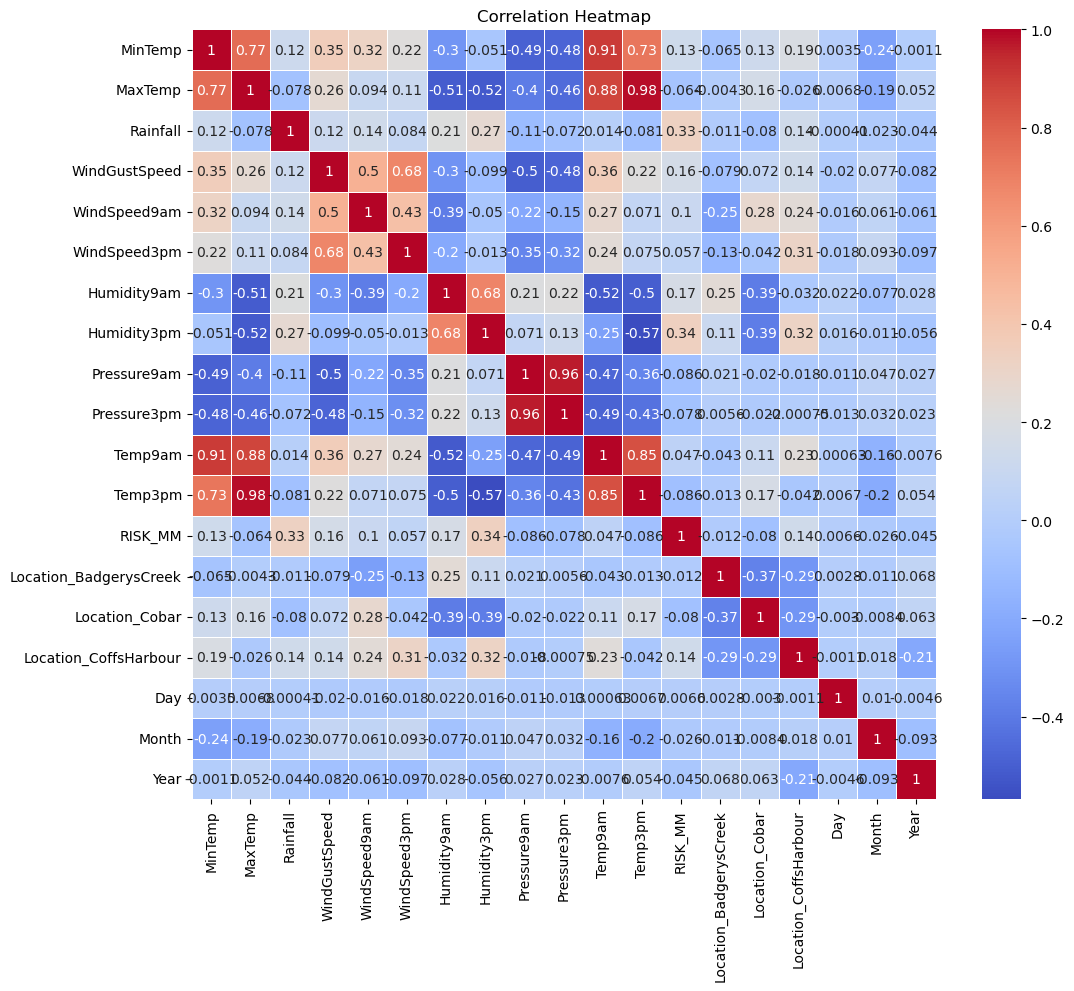

In [38]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [39]:
label_encoder = LabelEncoder()

# Assuming 'RainTomorrow' and 'RainToday' are separate columns in your DataFrame
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])



In [40]:
# Assuming df is your DataFrame
matching_rows = df[df['RainToday'] == df['RainTomorrow']]

# Calculate the matching percentage
matching_percentage = (len(matching_rows) / len(df)) * 100

# Display the matching percentage
print("Matching Percentage of 'RainToday' and 'RainTomorrow': {:.2f}%".format(matching_percentage))


Matching Percentage of 'RainToday' and 'RainTomorrow': 77.93%


# Visuilazation of rain today and rain tomorrow feature

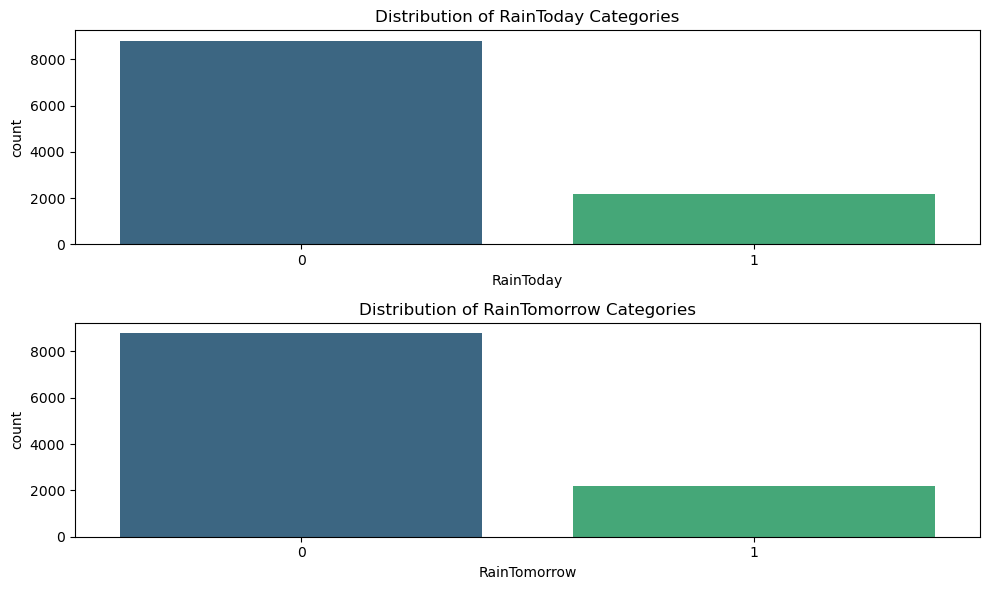

In [41]:
# Plot to check the matching data 
plt.figure(figsize=(10, 6))

# Count plot for 'RainToday'
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='RainToday', palette='viridis')
plt.title('Distribution of RainToday Categories')

# Count plot for 'RainTomorrow'
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='RainTomorrow', palette='viridis')
plt.title('Distribution of RainTomorrow Categories')

plt.tight_layout()
plt.show()


In [42]:
df

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0     2008-12-01     13.4     22.9       0.6           44.0          20.0   
1     2008-12-02      7.4     25.1       0.0           44.0           4.0   
2     2008-12-03     12.9     25.7       0.0           46.0          19.0   
3     2008-12-04      9.2     28.0       0.0           24.0          11.0   
4     2008-12-05     17.5     32.3       1.0           41.0           7.0   
...          ...      ...      ...       ...            ...           ...   
10994 2014-12-18     19.3     27.9       0.0           35.2          11.2   
10995 2014-12-19     19.8     31.3      33.4           35.2          11.2   
10996 2014-12-24     19.3     28.2       2.4           35.2          11.2   
10997 2014-12-25     21.5     28.2       0.0           35.2          11.2   
10998 2014-12-26     21.9     29.7       5.0           35.2          11.2   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0              24.0         71.0         22.0       1007.7       1007.1   
1              22.0         44.0         25.0       1010.6       1007.8   
2              26.0         38.0         30.0       1007.6       1008.7   
3               9.0         45.0         16.0       1017.6       1012.8   
4              20.0         82.0         33.0       1010.8       1006.0   
...             ...          ...          ...          ...          ...   
10994          15.7         77.0         76.0       1018.2       1015.6   
10995          15.7         58.0         68.0       1018.2       1015.6   
10996          15.7         64.0         65.0       1018.2       1015.6   
10997          15.7         69.0         73.0       1018.2       1015.6   
10998          15.7         81.0         69.0       1018.2       1015.6   

       Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  \
0         16.9     21.8          0      0.0             0   
1         17.2     24.3          0      0.0             0   
2         21.0     23.2          0      0.0             0   
3         18.1     26.5          0      1.0             0   
4         17.8     29.7          0      0.2             0   
...        ...      ...        ...      ...           ...   
10994     24.4     26.9          0     33.4             1   
10995     24.8     25.4          1      0.0             0   
10996     26.4     27.8          0      0.0             0   
10997     26.1     25.7          0      5.0             1   
10998     24.9     28.5          1     20.2             1   

       Location_BadgerysCreek  Location_Cobar  Location_CoffsHarbour  Day  \
0                           0               0                      0    1   
1                           0               0                      0    2   
2                           0               0                      0    3   
3                           0               0                      0    4   
4                           0               0                      0    5   
...                       ...             ...                    ...  ...   
10994                       0               0                      1   18   
10995                       0               0                      1   19   
10996                       0               0                      1   24   
10997                       0               0                      1   25   
10998                       0               0                      1   26   

       Month  Year  
0         12  2008  
1         12  2008  
2         12  2008  
3         12  2008  
4         12  2008  
...      ...   ...  
10994     12  2014  
10995     12  2014  
10996     12  2014  
10997     12  2014  
10998     12  2014  

[10999 rows x 22 columns]

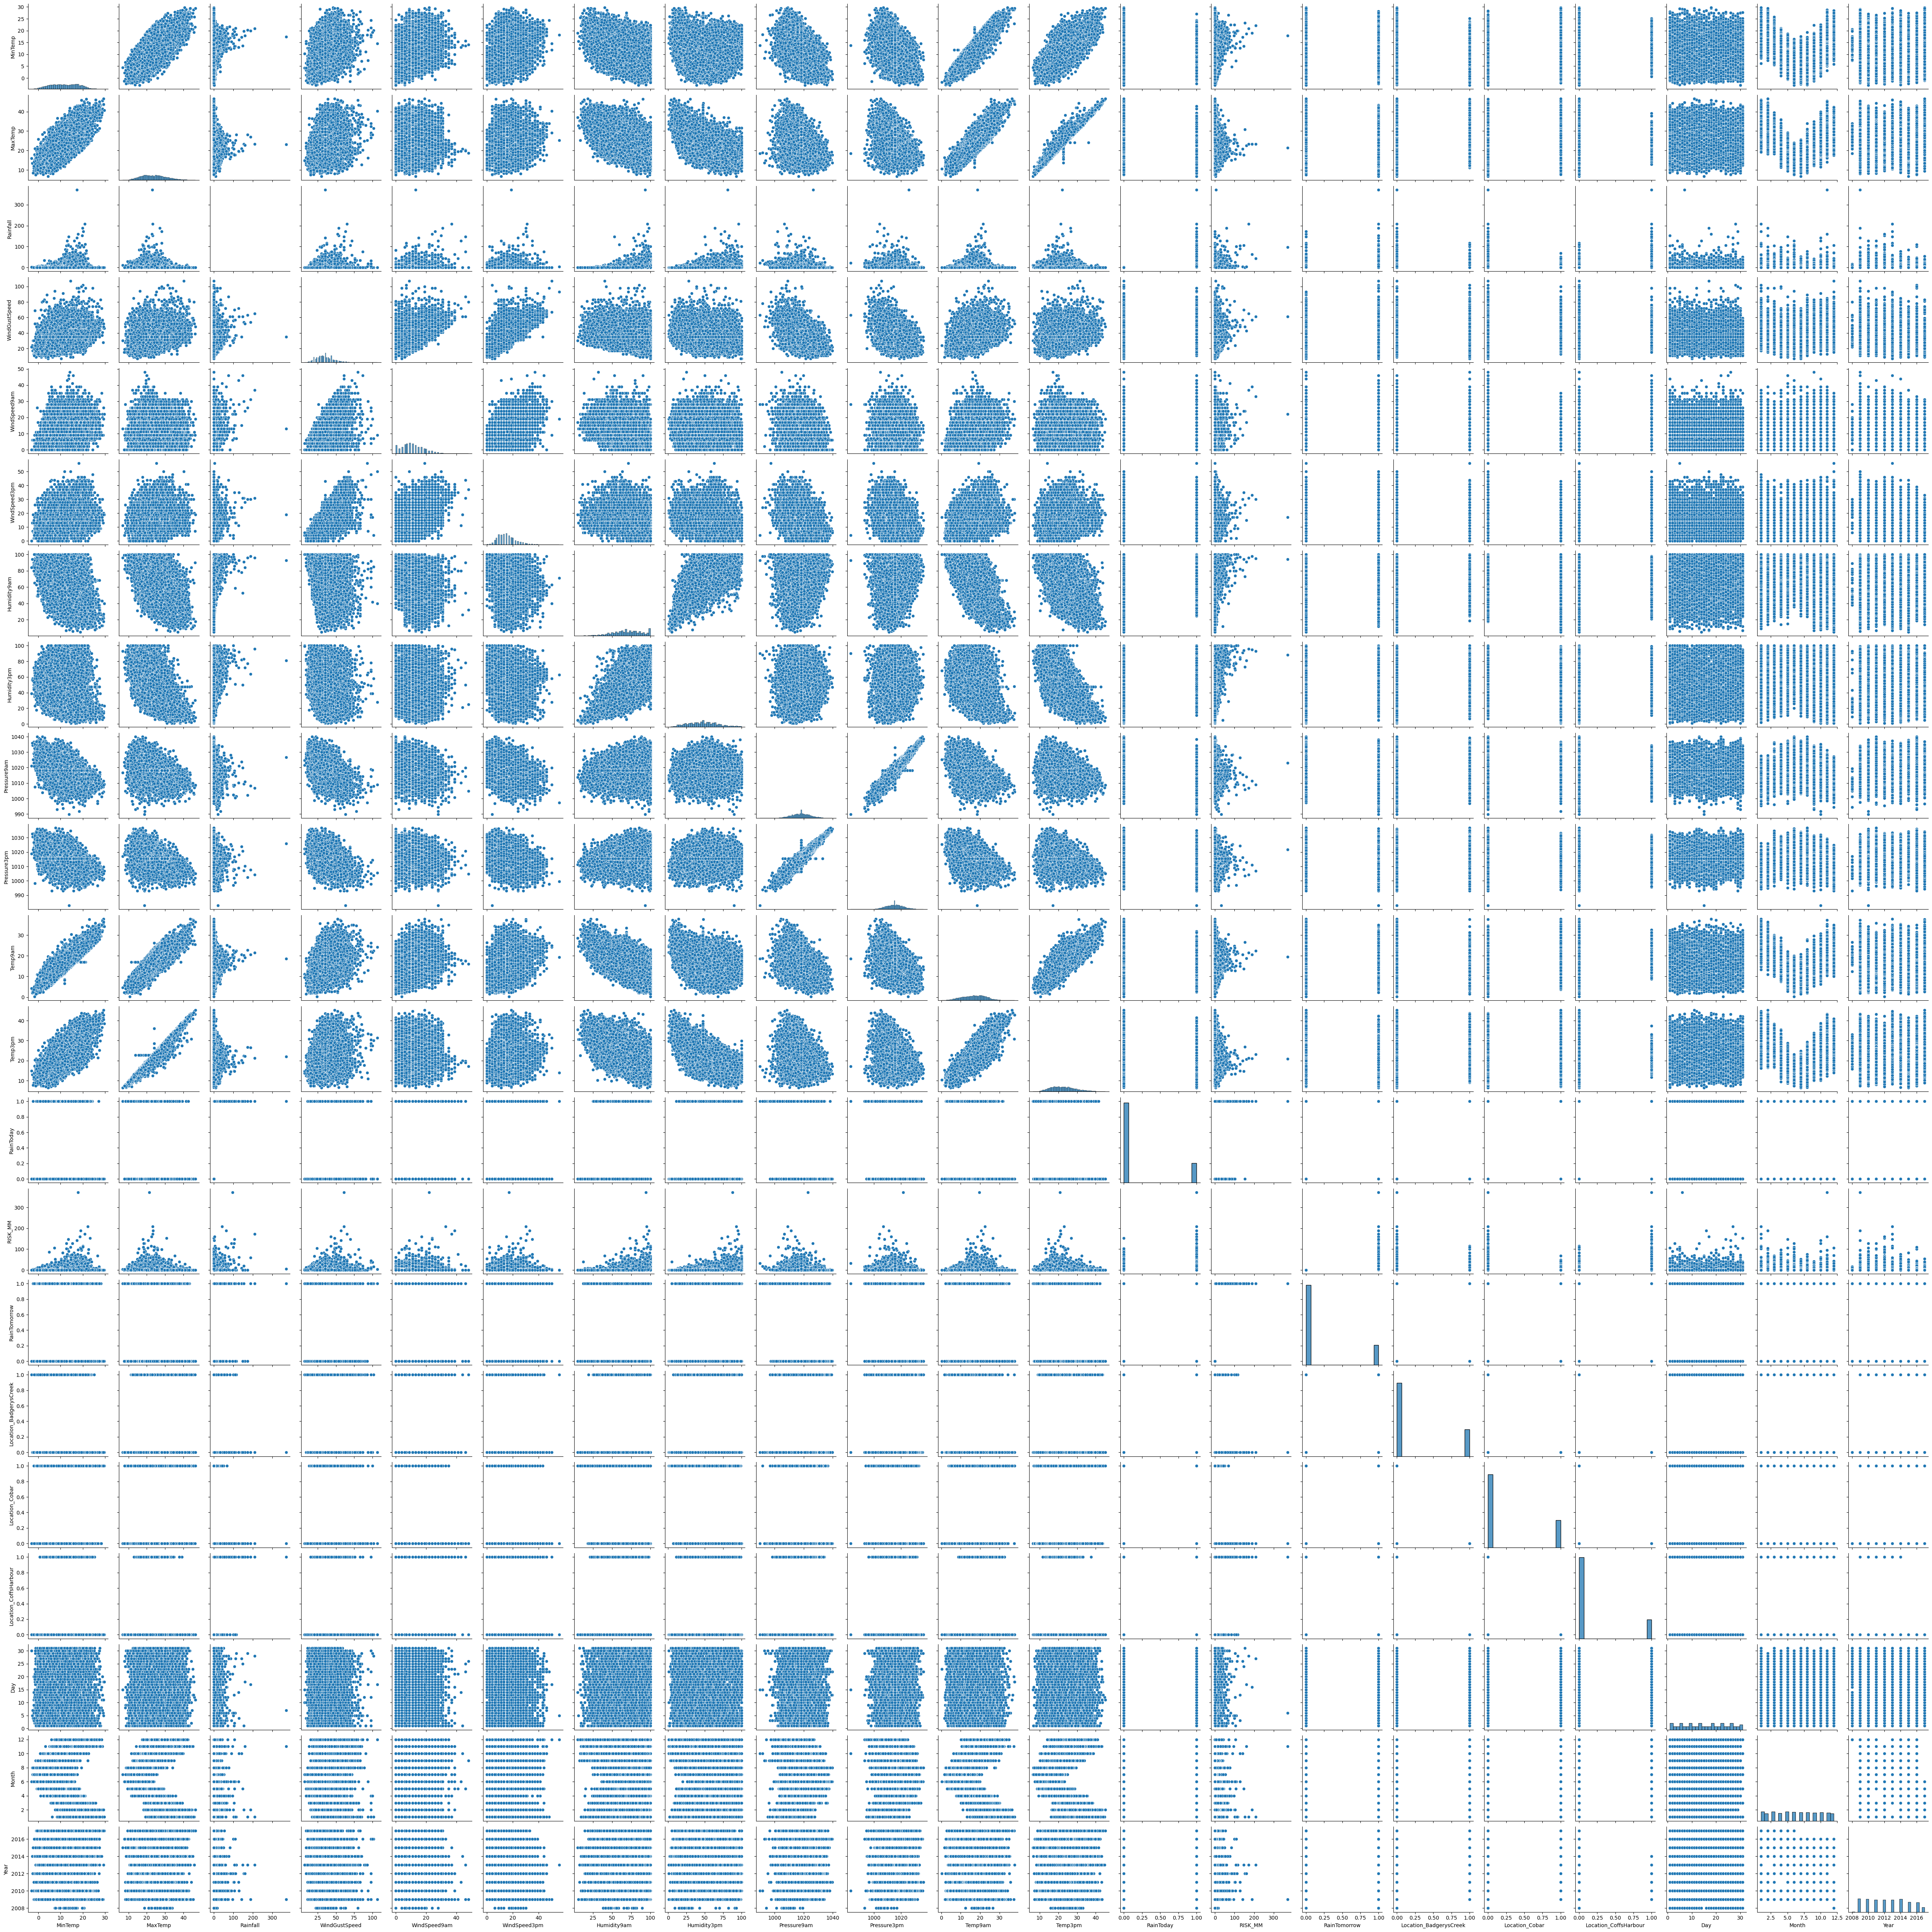

In [43]:
numerical_cols = df.select_dtypes(include='number').columns


sns.pairplot(df[numerical_cols])
plt.show()


In [44]:
df.head()

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0 2008-12-01     13.4     22.9       0.6           44.0          20.0   
1 2008-12-02      7.4     25.1       0.0           44.0           4.0   
2 2008-12-03     12.9     25.7       0.0           46.0          19.0   
3 2008-12-04      9.2     28.0       0.0           24.0          11.0   
4 2008-12-05     17.5     32.3       1.0           41.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  \
0          24.0         71.0         22.0       1007.7       1007.1     16.9   
1          22.0         44.0         25.0       1010.6       1007.8     17.2   
2          26.0         38.0         30.0       1007.6       1008.7     21.0   
3           9.0         45.0         16.0       1017.6       1012.8     18.1   
4          20.0         82.0         33.0       1010.8       1006.0     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow  Location_BadgerysCreek  \
0     21.8          0      0.0             0                       0   
1     24.3          0      0.0             0                       0   
2     23.2          0      0.0             0                       0   
3     26.5          0      1.0             0                       0   
4     29.7          0      0.2             0                       0   

   Location_Cobar  Location_CoffsHarbour  Day  Month  Year  
0               0                      0    1     12  2008  
1               0                      0    2     12  2008  
2               0                      0    3     12  2008  
3               0                      0    4     12  2008  
4               0                      0    5     12  2008

In [45]:
# Rearranging the Columns as we need to split it into train and test
df = df[['Day', 'Month', 'Year','Location_BadgerysCreek', 'Location_Cobar',
       'Location_CoffsHarbour', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm','RISK_MM','RainToday','Rainfall', 'RainTomorrow']]

# Print the updated DataFrame
df.head()


Day  Month  Year  Location_BadgerysCreek  Location_Cobar  \
0    1     12  2008                       0               0   
1    2     12  2008                       0               0   
2    3     12  2008                       0               0   
3    4     12  2008                       0               0   
4    5     12  2008                       0               0   

   Location_CoffsHarbour  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
0                      0     13.4     22.9           44.0          20.0   
1                      0      7.4     25.1           44.0           4.0   
2                      0     12.9     25.7           46.0          19.0   
3                      0      9.2     28.0           24.0          11.0   
4                      0     17.5     32.3           41.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  \
0          24.0         71.0         22.0       1007.7       1007.1     16.9   
1          22.0         44.0         25.0       1010.6       1007.8     17.2   
2          26.0         38.0         30.0       1007.6       1008.7     21.0   
3           9.0         45.0         16.0       1017.6       1012.8     18.1   
4          20.0         82.0         33.0       1010.8       1006.0     17.8   

   Temp3pm  RISK_MM  RainToday  Rainfall  RainTomorrow  
0     21.8      0.0          0       0.6             0  
1     24.3      0.0          0       0.0             0  
2     23.2      0.0          0       0.0             0  
3     26.5      1.0          0       0.0             0  
4     29.7      0.2          0       1.0             0

In [46]:
df.shape

(10999, 21)

In [47]:
# Calculating the Class Distribution
class_distribution = df['RainTomorrow'].value_counts()

# Display the class distribution
print("Class Distribution:")
print(class_distribution)


Class Distribution:
0    8797
1    2202
Name: RainTomorrow, dtype: int64


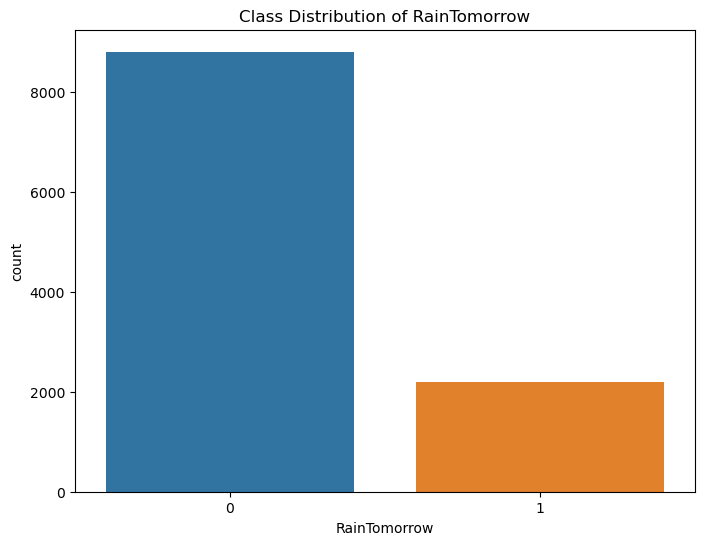

In [48]:
# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Class Distribution of RainTomorrow')
plt.show()


In [49]:
#as the data set is unbalanced we will target confusion matrics

# Dividing data into train and test

In [50]:

# DataFrame with rearranged columns
features = ['Day', 'Month', 'Year', 'Location_Cobar',
       'Location_CoffsHarbour', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday', 'Rainfall']
target = 'RainTomorrow'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)


Training set - Features: (8799, 19) Labels: (8799,)
Testing set - Features: (2200, 19) Labels: (2200,)


# Model Building
# 1 - Logistic Regression

In [51]:
# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training set
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9968181818181818

Confusion Matrix:
 [[1747    3]
 [   4  446]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       0.99      0.99      0.99       450

    accuracy                           1.00      2200
   macro avg       1.00      0.99      1.00      2200
weighted avg       1.00      1.00      1.00      2200



# 2 - SVM

In [52]:
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_SVM = accuracy_score(y_test, y_pred)
conf_matrix_SVM = confusion_matrix(y_test, y_pred)
classification_rep_SVM = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_SVM)
print("\nConfusion Matrix:\n", conf_matrix_SVM)
print("\nClassification Report:\n", classification_rep_SVM)

Accuracy: 0.9513636363636364

Confusion Matrix:
 [[1748    2]
 [ 105  345]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1750
           1       0.99      0.77      0.87       450

    accuracy                           0.95      2200
   macro avg       0.97      0.88      0.92      2200
weighted avg       0.95      0.95      0.95      2200



# 3 - Random Forest

In [54]:

random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_Ran = accuracy_score(y_test, y_pred)
conf_matrix_Ran = confusion_matrix(y_test, y_pred)
classification_rep_Ran = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_Ran)
print("\nConfusion Matrix:\n", conf_matrix_Ran)
print("\nClassification Report:\n", classification_rep_Ran)

Accuracy: 1.0

Confusion Matrix:
 [[1750    0]
 [   0  450]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00       450

    accuracy                           1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



In [55]:


# Create a DataFrame to compare the results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_SVM, accuracy_Ran],
    'Confusion Matrix': [conf_matrix, conf_matrix_SVM, conf_matrix_Ran],
    
})

# Display the comparison DataFrame
print(results_df)


                 Model  Accuracy         Confusion Matrix
0  Logistic Regression  0.996818    [[1747, 3], [4, 446]]
1                  SVM  0.951364  [[1748, 2], [105, 345]]
2        Random Forest  1.000000    [[1750, 0], [0, 450]]


# Fine tuning to get best Parameter with random forest

In [56]:
#Fine tune to get the best parameter 

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [57]:
# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_grid_search = best_model.predict(X_test)

# Evaluate the best model
accuracy_grid_search = accuracy_score(y_test, y_pred_grid_search)
conf_matrix_grid_search = confusion_matrix(y_test, y_pred_grid_search)
classification_rep_grid_search = classification_report(y_test, y_pred_grid_search)

# Display the results of the best model
print("Accuracy (Grid Search):", accuracy_grid_search)
print("\nConfusion Matrix (Grid Search):\n", conf_matrix_grid_search)
print("\nClassification Report (Grid Search):\n", classification_rep_grid_search)

Accuracy (Grid Search): 1.0

Confusion Matrix (Grid Search):
 [[1750    0]
 [   0  450]]

Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00       450

    accuracy                           1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



# So the best model is Random forest model with specified best parameters 
# Random forest model is the final model

As , having 0 false positives and 0 false negatives means that our model is achieving perfect precision, recall,
and accuracy on the test set. It suggests that the model is correctly classifying all instances.